# LSA

In [12]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [14]:
len(doc_ls)

12

In [15]:
U.shape

(12, 4)

In [16]:
Vt.shape

(4, 16)

In [17]:
tfidf.shape

(12, 16)

In [18]:
vocab = tfidf_vect.get_feature_names()
print(vocab)
n = 3
for i, topic in enumerate(Vt):
    print("Topic {}:".format(i), [ (vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

['가츠동', '김치', '김치찌개', '된장', '된장찌개', '라면', '바나나', '볶음밥', '비빔밥', '사과', '소바', '스시', '짜장면', '짬뽕', '탕수육', '포도']
Topic 0: [('포도', 0.583), ('짜장면', 0.499), ('사과', 0.33)]
Topic 1: [('짜장면', 0.44), ('짬뽕', 0.391), ('스시', 0.315)]
Topic 2: [('스시', 0.703), ('라면', 0.353), ('가츠동', 0.253)]
Topic 3: [('김치', 0.682), ('비빔밥', 0.373), ('된장찌개', 0.272)]


In [19]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors):
    def consine_similarity(a, b):
        return dot(a, b)/(norm(a)*norm(b))

    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))

    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = consine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

In [20]:
word_vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, label):
    mask =np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rc('font', family='NanumBarunGothic')
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                     annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backe

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


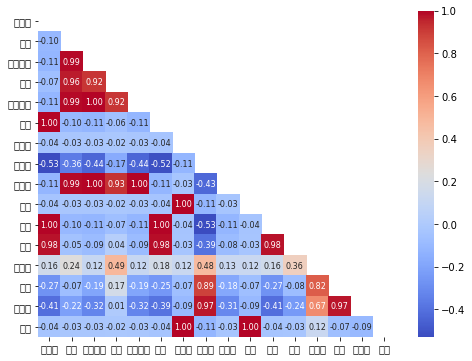

In [22]:
visualize_similarity(word_similarity_matrix, vocab)

In [24]:
U.shape

(12, 4)

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


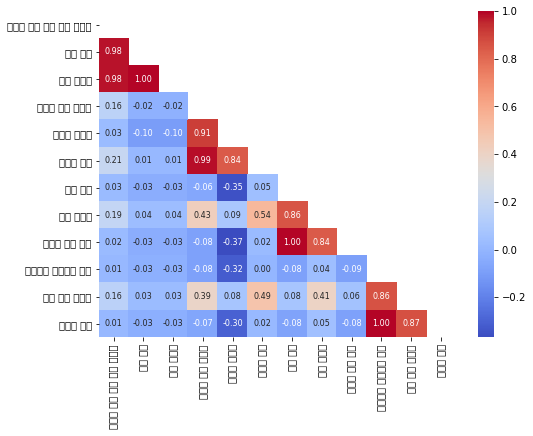

In [25]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize_similarity(doc_similarity_matrix, doc_ls)

In [26]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(T[:,0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

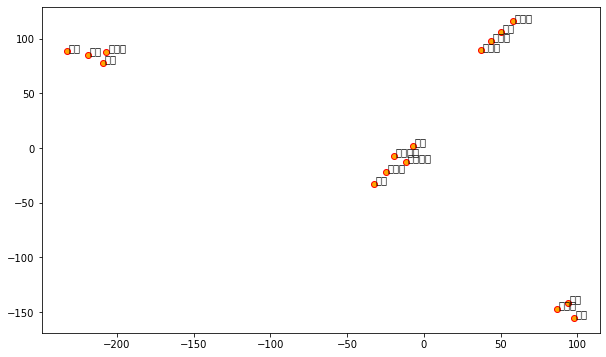

In [27]:
visualize_vectors(word_vectors, vocab)

# LDA

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rnru1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rnru1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rnru1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
import enum
import random
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, porter
from nltk.corpus import stopwords
from collections import defaultdict

topic_indices = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]

doc_ls = ["Cute kitty", 
"Eat rice or cake", 
"Kitty and hamster",
"Eat bread", 
"Rice, bread and cake", 
"Cute hamster eats bread and cake"]


In [34]:

class LDA:

    def __init__(self, docs, topic_num, alpha=0.1, beta=0.001):
        self.alpha = alpha
        self.beta = beta
        self.k = topic_num
        self.docs = docs

    def randomly_analysis_topic (self):
        dic = defaultdict()
        t2i = defaultdict(lambda: len(t2i))
        i2t = defaultdict()

        porter = PorterStemmer()
        stopword = stopwords.words('english')
        stopword.append(',')
        index = 0
        for d, tokens in enumerate([word_tokenize(doc) for doc in self.docs]):
            for w, token in enumerate([porter.stem(token.lower()) for token in tokens if token not in stopword]):
                i2t[t2i[token]]= token
                dic[(d, t2i[token], w)] = topic_indices[index]
                # dic[(d, t2i[token], w)] = random.randint(0, self.k -1)
                index += 1

        return dic, t2i, i2t

    def count_doc_topic(self, term_topic, t2i):
        docs = np.zeros((self.k, len(self.docs)))
        terms = np.zeros((self.k, len(t2i)))

        docs.fill(self.alpha)
        terms.fill(self.beta)

        for (d, n, w) in term_topic.keys():
            topic = term_topic[(d, n, w)]
            docs[topic, d] += 1
            terms[topic, n] += 1

        print(docs)
        print(terms)

        return docs, terms



    def iterate_assign_topic(self, term_topic, docs, terms, i2t):
        prev = {}

        while prev != term_topic:
            for (d, n, w) in term_topic:
                topic = [0, 0]

                docs[term_topic[(d, n, w)], d] -= 1
                terms[term_topic[(d, n, w)], n] -= 1

                prev = term_topic

                for t in range(self.k):
                    p_t_d = docs[t, d] /docs[:, d].sum()
                    p_w_t = terms[t, n] / terms[t, :].sum()
                    prob = p_t_d * p_w_t

                    if topic[1] < prob:
                        topic = [t, prob]


                term_topic[(d, n, w)] = topic[0]
                docs[topic[0], d] += 1
                terms[topic[0], n] += 1

        return terms


    def topic_modeling(self, count=3):
        term_topic, t2i, i2t = self.randomly_analysis_topic()
        docs, terms  = self.count_doc_topic(term_topic, t2i)
        terms = self.iterate_assign_topic(term_topic, docs, terms, i2t)

        score = terms / terms.sum(axis=1, keepdims=True)

        for i in range(self.k):
            print(f"topic {i} =>", end=" ")
            sorted_index = np.flip(np.argsort(score[i]), 0)[:count]
            for j in sorted_index:
                print("({}, {})".format(i2t[j], score[i, j].round(3)), end=" ")

            print("")


In [35]:
lda = LDA(doc_ls, 2)
lda.topic_modeling(3)

[[1.1 2.1 0.1 2.1 2.1 2.1]
 [1.1 1.1 2.1 0.1 1.1 3.1]]
[[1.001 0.001 2.001 1.001 3.001 0.001 2.001]
 [1.001 2.001 1.001 1.001 0.001 2.001 1.001]]
topic 0 => (bread, 0.273) (cake, 0.273) (eat, 0.273) 
topic 1 => (hamster, 0.333) (kitti, 0.333) (cute, 0.333) 


In [42]:
pip install pyLDAvis

Processing c:\users\rnru1\appdata\local\pip\cache\wheels\c9\21\f6\17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f\pyldavis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)
  Using cached pandas-1.3.0-cp37-cp37m-win_amd64.whl (10.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state = 42, remove=('header', 'footer', 'quotes'))

In [7]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
print(dataset.data[0])
doc = nlp(dataset.data[0])
result = " ".join([token.text for token in doc if token.is_stop == False and token.tag_[0] == 'N'])
print("*"*30)
print(result)
# for token in doc:
#     print(token.text, token.lemma_, token.tag_, token.pos_, token.is_stop, )

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





******************************
lerxst@wam.umd.edu thing Subject car Nntp Posting Host rac3.wam.umd.edu Organization University Maryland College Park Lines car day door sports car 60s/ 70s Bricklin doors addition bumper rest body model engine specs years production car history i

In [10]:
def cleansing(text) :
    result = ""
    if text : 
        doc = nlp(text)
        result = " ".join([token.text for token in doc if token.is_stop == False and token.tag_[0] in ['N', 'V']])
        return result
    
    return result

In [11]:
import pandas as pd

news_df = pd.DataFrame({'document' : dataset.data})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: " ".join([w.lower() for w in x.split() if len(w) > 3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(cleansing)

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [ ]:
def my_tokenizer(text):
    return text.split()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf = tfidf_vect.fit_transform(news_df['clean_doc'])
lda = LatentDirichletAllocation(n_components=20, max_iter=20, learning_method='online', random_state=42)
lda_output = lda.fit_transform(tfidf)


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne') # tsne 차원 축소할떄 쓴다, mds 매서드라는 뜻
pyLDAvis.display(vis)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
def tuning_hyperparams(train_data, n_jobs=1) :                
    lda_pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(tokenizer = my_tokenizer)),
                              ('lda', LatentDirichletAllocation(max_iter=10, random_state=100))])
    search_params = {'tfidf_vect__ngram_range': [(1, 1), (1, 2)],
                    'lda__n_components': [5, 10, 20]}
    gs_lda = GridSearchCV(lda_pipeline, search_params, n_jobs=n_jobs)
    gs_lda = gs_lda.fit(train_data)
    print("Best score: {0}".format(gs_lda.best_score_))  
    print("Best parameters set:")  
    best_parameters = gs_lda.best_estimator_.get_params()  
    for param_name in sorted(list(best_parameters.keys())):  
        print("\t{0}: {1}".format(param_name, best_parameters[param_name]))
    return gs_lda.best_estimator_
lda_pipeline = tuning_hyperparams(news_df["clean_doc"])

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best score: -159545.3561464975
Best parameters set:
	lda: LatentDirichletAllocation(n_components=5, random_state=100)
	lda__batch_size: 128
	lda__doc_topic_prior: None
	lda__evaluate_every: -1
	lda__learning_decay: 0.7
	lda__learning_method: batch
	lda__learning_offset: 10.0
	lda__max_doc_update_iter: 100
	lda__max_iter: 10
	lda__mean_change_tol: 0.001
	lda__n_components: 5
	lda__n_jobs: None
	lda__perp_tol: 0.1
	lda__random_state: 100
	lda__topic_word_prior: None
	lda__total_samples: 1000000.0
	lda__verbose: 0
	memory: None
	steps: [('tfidf_vect', TfidfVectorizer(tokenizer=<function my_tokenizer at 0x000001A218BD23A8>)), ('lda', LatentDirichletAllocation(n_components=5, random_state=100))]
	tfidf_vect: TfidfVectorizer(tokenizer=<function my_tokenizer at 0x000001A218BD23A8>)
	tfidf_vect__analyzer: word
	tfidf_vect__binary: False
	tfidf_vect__decode_error: strict
	tfidf_vect__dtype: <class 'numpy.float64'>
	tfidf_vect__encoding: utf-8
	tfidf_vect__input: content
	tfidf_vect__lowercase: 

In [64]:
tfidf_vect = lda_pipeline.named_steps['tfidf_vect']
tfidf = tfidf_vect.fit_transform(news_df["clean_doc"])
lda = lda_pipeline.named_steps['lda']
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
